In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Define dataset path
dataset_path = '/kaggle/input/prinom/CoLeaf DATASET'


In [4]:
# Image data generation with more augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Using 20% of the data for validation
)

In [5]:
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    subset='training'
)

Found 809 images belonging to 10 classes.


In [6]:
validation_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    subset='validation'
)

Found 197 images belonging to 10 classes.


In [7]:
# Load the VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False


In [9]:
# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(train_data.num_classes, activation='softmax')(x)


In [10]:
# Define the new model
model = Model(inputs=base_model.input, outputs=output_layer)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)


In [13]:
# Train the model
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=50,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/26 ━━━━━━━━━━━━━━━━━━━━ 25:28 61s/step - accuracy: 0.0312 - loss: 2.5362

I0000 00:00:1716286491.679533     124 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716286491.702203     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 3/26 ━━━━━━━━━━━━━━━━━━━━ 2:18 6s/step - accuracy: 0.0368 - loss: 4.5951 

W0000 00:00:1716286503.659998     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1678 - loss: 5.1366

W0000 00:00:1716286575.038898     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 169s 4s/step - accuracy: 0.1702 - loss: 5.0923 - val_accuracy: 0.2995 - val_loss: 2.0397
Epoch 2/50


W0000 00:00:1716286599.400333     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.3315 - loss: 1.9663 - val_accuracy: 0.3604 - val_loss: 1.8738
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.3757 - loss: 1.8446 - val_accuracy: 0.4061 - val_loss: 1.8066
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.4138 - loss: 1.7044 - val_accuracy: 0.4010 - val_loss: 1.7679
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.4006 - loss: 1.7341 - val_accuracy: 0.3706 - val_loss: 1.7405
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.4670 - loss: 1.5781 - val_accuracy: 0.3604 - val_loss: 1.8090
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.4150 - loss: 1.6896 - val_accuracy: 0.4112 - val_loss: 1.7896
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.4185 - loss: 1.6342 - val_accuracy: 0.3858 - val_loss: 1.8131
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.4046 - loss: 1.6546 - val_accuracy: 0.3909 - val_loss: 1.8274
E

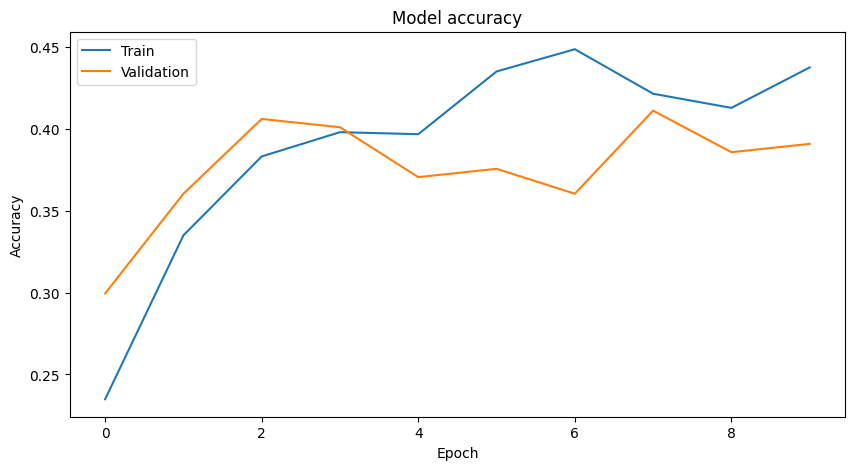

In [14]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


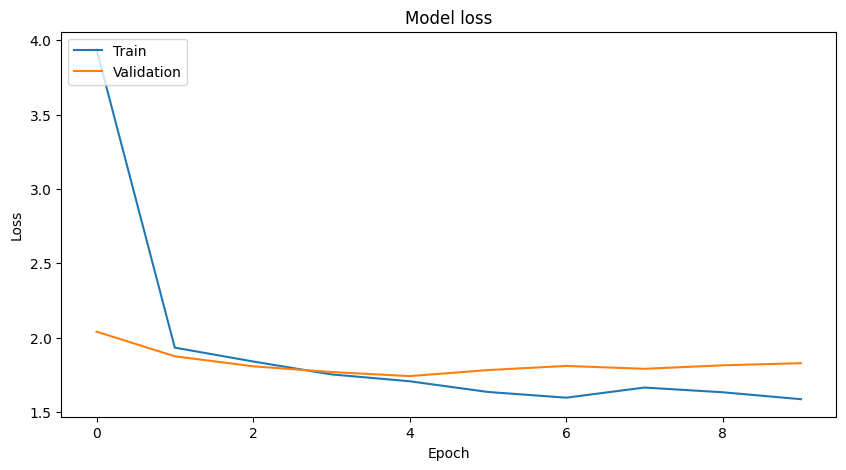

In [15]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
# Function to plot predictions
def plot_predictions(model, dataset, class_labels, num_images=9):
    plt.figure(figsize=(12, 12))
    
    images, labels = next(dataset)  # Get a batch of images and labels from the generator
    predictions = model.predict(images)
    
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        image = images[i]
        true_label = class_labels[np.argmax(labels[i])]
        predicted_label = class_labels[np.argmax(predictions[i])]
        plt.imshow(image)
        plt.title(f"Predicted: {predicted_label}, True: {true_label}")
        plt.axis("off")
    
    plt.show()


In [17]:
# Mapping of class indices to class labels
class_labels = {v: k for k, v in train_data.class_indices.items()}



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


W0000 00:00:1716287482.438606     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


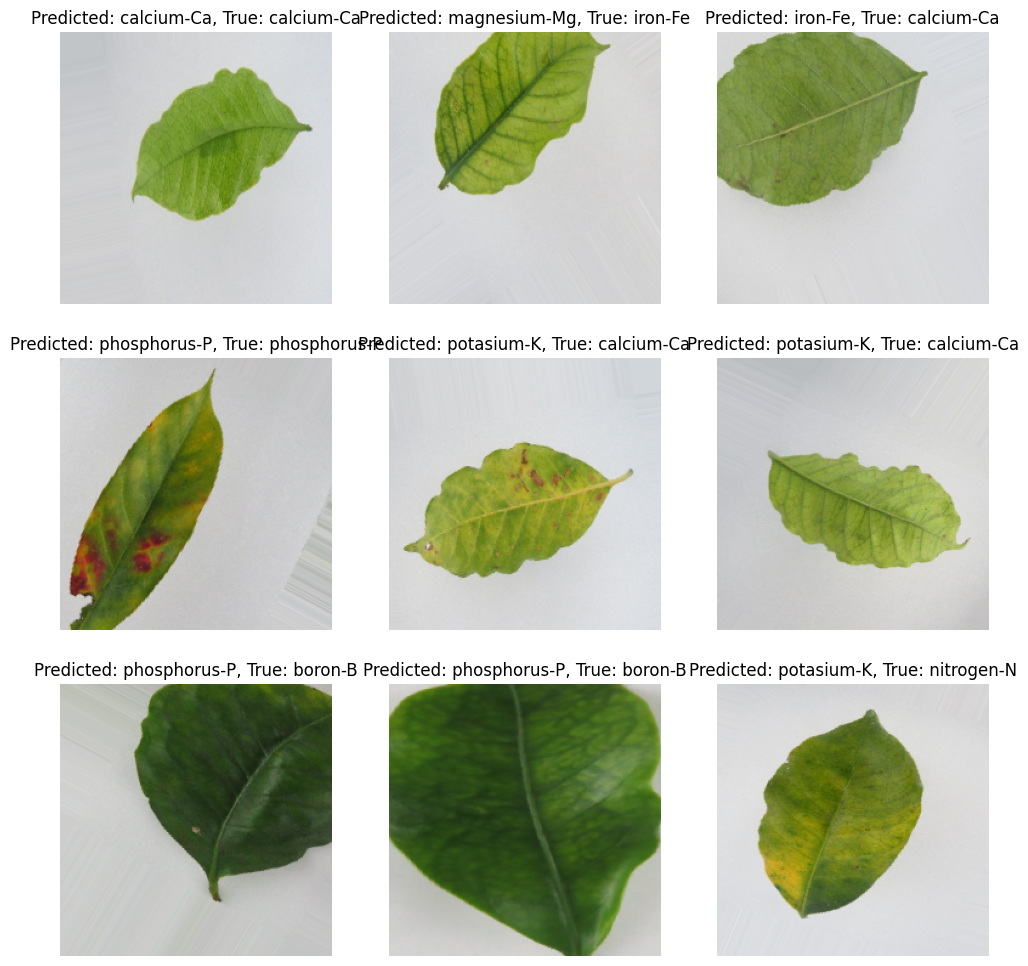

In [18]:
# Plot predictions using the custom CNN model
plot_predictions(model, validation_data, class_labels)